In [2]:
import json
import sqlalchemy

In [3]:
try:
    with open("db_config.json", "r") as f:
        db_config = json.load(f)
except FileNotFoundError:
    print("db_config.json dosyası bulunamadı")
    exit()

In [4]:
try:
    user = db_config['user']
    password = db_config['password']
    host = db_config['host']
    port = db_config['port']
    database = db_config['database']
except KeyError:
    print("db_config.json dosyasında eksik bilgi var")
    exit()


In [5]:
try:
    engine = sqlalchemy.create_engine(f"postgresql://{localhost}:{password}@{host}:{port}/{database}")
except Exception as e:
    print(f"Veritabanı bağlantı hatası: {e}")
    exit()

Veritabanı bağlantı hatası: name 'localhost' is not defined


: 

#### Soru 1

Northwind veritabanında müşterilerin toplam harcaması,
sipariş sayısı ve ortalama sipariş büyüklüğüne göre
bir müşterinin önümüzdeki 6 ay içinde
tekrar sipariş verip vermeyeceğini tahmin eden
bir derin öğrenme modeli kur.

In [1]:
import pandas as pd
import numpy as np

In [6]:
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['us_states',
 'customers',
 'orders',
 'employees',
 'shippers',
 'products',
 'order_details',
 'categories',
 'suppliers',
 'region',
 'territories',
 'employee_territories',
 'customer_demographics',
 'customer_customer_demo']

In [7]:
orders = pd.read_sql_table("orders", engine)
order_details = pd.read_sql_table("order_details", engine)
products = pd.read_sql_table("products", engine)
categories = pd.read_sql_table("categories", engine)
region = pd.read_sql_table("region", engine)

c:\Users\kaptan\anaconda3\Lib\site-packages\pandas\io\sql.py:1665: SAWarning: Did not recognize type 'bpchar' of column 'customer_id'
  self.meta.reflect(bind=self.con, only=[table_name], views=True)
c:\Users\kaptan\anaconda3\Lib\site-packages\pandas\io\sql.py:1665: SAWarning: Did not recognize type 'bpchar' of column 'customer_id'
  self.meta.reflect(bind=self.con, only=[table_name], views=True)
c:\Users\kaptan\anaconda3\Lib\site-packages\pandas\io\sql.py:1665: SAWarning: Did not recognize type 'bpchar' of column 'region_description'
  self.meta.reflect(bind=self.con, only=[table_name], views=True)


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          830 non-null    int64         
 1   customer_id       830 non-null    object        
 2   employee_id       830 non-null    int64         
 3   order_date        830 non-null    datetime64[ns]
 4   required_date     830 non-null    datetime64[ns]
 5   shipped_date      809 non-null    datetime64[ns]
 6   ship_via          830 non-null    int64         
 7   freight           830 non-null    float64       
 8   ship_name         830 non-null    object        
 9   ship_address      830 non-null    object        
 10  ship_city         830 non-null    object        
 11  ship_region       323 non-null    object        
 12  ship_postal_code  811 non-null    object        
 13  ship_country      830 non-null    object        
dtypes: datetime64[ns](3), floa

In [9]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null   int64  
 2   unit_price  2155 non-null   float64
 3   quantity    2155 non-null   int64  
 4   discount    2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         77 non-null     int64  
 1   product_name       77 non-null     object 
 2   supplier_id        77 non-null     int64  
 3   category_id        77 non-null     int64  
 4   quantity_per_unit  77 non-null     object 
 5   unit_price         77 non-null     float64
 6   units_in_stock     77 non-null     int64  
 7   units_on_order     77 non-null     int64  
 8   reorder_level      77 non-null     int64  
 9   discontinued       77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [12]:
sql_query = """
select
o.order_id, o.customer_id, o.order_date, o.ship_country,
od.unit_price, od.quantity, od.discount,
p.category_id, p.product_id
from orders o
join order_details od on o.order_id = od.order_id
join products p on od.product_id = p.product_id
"""

data = pd.read_sql(sql_query, engine)

In [13]:
data.head()

,order_id,customer_id,order_date,ship_country,unit_price,quantity,discount,category_id,product_id
0,10248,VINET,1996-07-04,France,14.0,12,0.0,4,11
1,10248,VINET,1996-07-04,France,9.8,10,0.0,5,42
2,10248,VINET,1996-07-04,France,34.8,5,0.0,4,72
3,10249,TOMSP,1996-07-05,Germany,18.6,9,0.0,7,14
4,10249,TOMSP,1996-07-05,Germany,42.4,40,0.0,7,51


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      2155 non-null   int64  
 1   customer_id   2155 non-null   object 
 2   order_date    2155 non-null   object 
 3   ship_country  2155 non-null   object 
 4   unit_price    2155 non-null   float64
 5   quantity      2155 non-null   int64  
 6   discount      2155 non-null   float64
 7   category_id   2155 non-null   int64  
 8   product_id    2155 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 151.7+ KB


In [15]:
categoricalFeature = ["order_id",
                      "customer_id",
                      "ship_country",
                      "category_id",
                      "product_id"]
for feature in categoricalFeature:
    data[feature] = data[feature].astype("category")

In [16]:
data["order_date"] = pd.to_datetime(data["order_date"])

In [17]:
data.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
unit_price,2155.0,26.218520,29.827418,2.0,12.0,18.4,32.0,263.50
quantity,2155.0,23.812993,19.022047,1.0,10.0,20.0,30.0,130.00
discount,2155.0,0.056167,0.083450,0.0,0.0,0.0,0.1,0.25


In [18]:
data.describe(include="category").T

,count,unique,top,freq
order_id,2155,830,11077,25
customer_id,2155,89,SAVEA,116
ship_country,2155,21,USA,352
category_id,2155,8,1,404
product_id,2155,77,59,54


In [19]:
data.describe(include="datetime")

,order_date
count,2155
mean,1997-08-05 06:12:11.693735424
min,1996-07-04 00:00:00
25%,1997-02-19 00:00:00
50%,1997-09-04 00:00:00
75%,1998-01-31 12:00:00
max,1998-05-06 00:00:00


In [20]:
df = pd.DataFrame(data=data["customer_id"].unique(), columns=["customer_id"])

In [21]:
df.head()

,customer_id
0,VINET
1,TOMSP
2,HANAR
3,VICTE
4,SUPRD


In [22]:
df = df.sort_values("customer_id").reset_index(drop=True)

In [23]:
df.head()

,customer_id
0,ALFKI
1,ANATR
2,ANTON
3,AROUT
4,BERGS


In [24]:
data["order_size"] = data["unit_price"] * data["quantity"] * (1 - data["discount"])

In [25]:
# Sipariş sayısı
order_count = data.groupby("customer_id")["order_id"].agg(["count"])
order_count

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\1885811812.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_count = data.groupby("customer_id")["order_id"].agg(["count"])


,count
customer_id,
ALFKI,12
ANATR,10
ANTON,17
AROUT,30
BERGS,52
...,...
WARTH,37
WELLI,19
WHITC,40


In [26]:
order_count = order_count.reset_index()
order_count

,customer_id,count
0,ALFKI,12
1,ANATR,10
2,ANTON,17
3,AROUT,30
4,BERGS,52
...,...,...
84,WARTH,37
85,WELLI,19
86,WHITC,40
87,WILMK,17


In [27]:
df["order_count"] = order_count["count"]

In [28]:
order_size = data.groupby(["customer_id", "order_id"])["order_size"].agg("sum")
order_size = order_size.reset_index().query("order_size != 0").reset_index(drop=True)
order_size

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\473876835.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_size = data.groupby(["customer_id", "order_id"])["order_size"].agg("sum")


,customer_id,order_id,order_size
0,ALFKI,10643,814.50
1,ALFKI,10692,878.00
2,ALFKI,10702,330.00
3,ALFKI,10835,845.80
4,ALFKI,10952,471.20
...,...,...,...
825,WOLZA,10792,399.85
826,WOLZA,10870,160.00
827,WOLZA,10906,427.50
828,WOLZA,10998,686.00


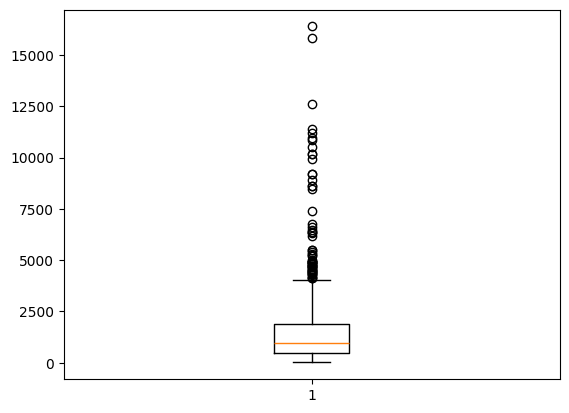

In [29]:
import matplotlib.pyplot as plt

plt.boxplot(order_size["order_size"]);

In [30]:
median_order_size = order_size.groupby("customer_id")["order_size"].agg("median")
median_order_size = median_order_size.reset_index()
median_order_size

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\1021890079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_order_size = order_size.groupby("customer_id")["order_size"].agg("median")


,customer_id,order_size
0,ALFKI,830.1500
1,ANATR,399.8750
2,ANTON,749.0625
3,AROUT,480.0000
4,BERGS,1277.6000
...,...,...
84,WARTH,877.2000
85,WELLI,517.8000
86,WHITC,1284.6900
87,WILMK,452.9000


In [31]:
df["median_order_size"] = median_order_size["order_size"]

In [32]:
df.head()

,customer_id,order_count,median_order_size
0,ALFKI,12,830.1500
1,ANATR,10,399.8750
2,ANTON,17,749.0625
3,AROUT,30,480.0000
4,BERGS,52,1277.6000


In [33]:
# her müşteri için bir ülkeye teslimat yapıldığı gözlemlendi (89 müşteri 89 satır)
customer_country = data.groupby("customer_id")["ship_country"].value_counts()
customer_country = customer_country.reset_index().query("count != 0").reset_index(drop=True)
customer_country["customer_id"].nunique() # 89 customer_id vardır
customer_country

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\3350526445.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_country = data.groupby("customer_id")["ship_country"].value_counts()


,customer_id,ship_country,count
0,ALFKI,Germany,12
1,ANATR,Mexico,10
2,ANTON,Mexico,17
3,AROUT,UK,30
4,BERGS,Sweden,52
...,...,...,...
84,WARTH,Finland,37
85,WELLI,Brazil,19
86,WHITC,USA,40
87,WILMK,Finland,17


In [34]:
df["country"] = customer_country["ship_country"]

In [35]:
# her müşteri için en çok satın alım gerçekleştirdiği category_id değerini bulmak
category_counts = data.groupby(['customer_id', 'category_id'])["category_id"].agg(["count"])
category_counts = category_counts.reset_index()
category_counts

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\3973344950.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = data.groupby(['customer_id', 'category_id'])["category_id"].agg(["count"])


,customer_id,category_id,count
0,ALFKI,1,2
1,ALFKI,2,4
2,ALFKI,3,0
3,ALFKI,4,2
4,ALFKI,5,0
...,...,...,...
707,WOLZA,4,2
708,WOLZA,5,0
709,WOLZA,6,1
710,WOLZA,7,2


In [36]:
# en çok satın alınan kategori
top_categories = category_counts.loc[category_counts.groupby('customer_id')['count'].idxmax()]
top_categories = top_categories.reset_index(drop = True)
top_categories

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\2360955510.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = category_counts.loc[category_counts.groupby('customer_id')['count'].idxmax()]


,customer_id,category_id,count
0,ALFKI,2,4
1,ANATR,4,5
2,ANTON,4,5
3,AROUT,1,6
4,BERGS,1,13
...,...,...,...
84,WARTH,4,9
85,WELLI,1,5
86,WHITC,3,8
87,WILMK,1,4


In [37]:
df["top_category"] = top_categories["category_id"]

In [38]:
df

,customer_id,order_count,median_order_size,country,top_category
0,ALFKI,12,830.1500,Germany,2
1,ANATR,10,399.8750,Mexico,4
2,ANTON,17,749.0625,Mexico,4
3,AROUT,30,480.0000,UK,1
4,BERGS,52,1277.6000,Sweden,1
...,...,...,...,...,...
84,WARTH,37,877.2000,Finland,4
85,WELLI,19,517.8000,Brazil,1
86,WHITC,40,1284.6900,USA,3
87,WILMK,17,452.9000,Finland,1


In [39]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else: # 9, 10, 11
        return 'Autumn'

data["season"] = data["order_date"].apply(get_season)


In [40]:
season_counts = data.groupby(["customer_id", "season"])["season"].agg(["count"])
season_counts = season_counts.reset_index()
season_counts

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\3103320892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = data.groupby(["customer_id", "season"])["season"].agg(["count"])


,customer_id,season,count
0,ALFKI,Autumn,3
1,ALFKI,Spring,4
2,ALFKI,Summer,3
3,ALFKI,Winter,2
4,ANATR,Autumn,3
...,...,...,...
351,WILMK,Winter,8
352,WOLZA,Autumn,0
353,WOLZA,Spring,5
354,WOLZA,Summer,3


In [41]:
top_season = season_counts.loc[season_counts.groupby('customer_id')['count'].idxmax()]
top_season = top_season.reset_index(drop=True)
top_season

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\87017513.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_season = season_counts.loc[season_counts.groupby('customer_id')['count'].idxmax()]


,customer_id,season,count
0,ALFKI,Spring,4
1,ANATR,Spring,4
2,ANTON,Autumn,6
3,AROUT,Winter,13
4,BERGS,Winter,22
...,...,...,...
84,WARTH,Winter,12
85,WELLI,Winter,10
86,WHITC,Spring,15
87,WILMK,Winter,8


In [42]:
df["top_season"] = top_season["season"]

In [43]:
df

,customer_id,order_count,median_order_size,country,top_category,top_season
0,ALFKI,12,830.1500,Germany,2,Spring
1,ANATR,10,399.8750,Mexico,4,Spring
2,ANTON,17,749.0625,Mexico,4,Autumn
3,AROUT,30,480.0000,UK,1,Winter
4,BERGS,52,1277.6000,Sweden,1,Winter
...,...,...,...,...,...,...
84,WARTH,37,877.2000,Finland,4,Winter
85,WELLI,19,517.8000,Brazil,1,Winter
86,WHITC,40,1284.6900,USA,3,Spring
87,WILMK,17,452.9000,Finland,1,Winter


In [44]:
# order_date sütunu datetime değilse dönüştür
data['order_date'] = pd.to_datetime(data['order_date'])

# 1. Aynı müşteri ve aynı tarihteki siparişleri tekilleştir
df_unique = data.drop_duplicates(subset=['customer_id', 'order_date'])

# 2. Sıralama
df_unique = df_unique.sort_values(['customer_id', 'order_date']).reset_index(drop=True)

# 3. Bir sonraki siparişin tarihini bul
df_unique['next_order_date'] = df_unique.groupby('customer_id')['order_date'].shift(-1)

# 4. Gün farkını hesapla
df_unique['days_diff'] = (df_unique['next_order_date'] - df_unique['order_date']).dt.days

# 5. 180 günden az olanları işaretle
df_unique['less_than_180'] = df_unique['days_diff'] < 180

# 6. Özet tablo
summary = df_unique.groupby('customer_id').agg(
    total_orders=('order_date', 'count'),
    orders_less_than_180=('less_than_180', 'sum')
).reset_index()

summary['percentage_less_than_180'] = 100 * summary['orders_less_than_180'] / summary['total_orders']
summary = summary.round(2)

# Sonuç
summary

summary['target'] = summary['percentage_less_than_180'].apply(lambda x: 1 if x >= 60 else 0)
summary['best_customer'] = pd.qcut(summary['percentage_less_than_180'], q=4, labels=['low', 'mid-low', 'mid-high', 'high'])
summary

C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\1724169458.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_unique['next_order_date'] = df_unique.groupby('customer_id')['order_date'].shift(-1)
C:\Users\kaptan\AppData\Local\Temp\ipykernel_14212\1724169458.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_unique.groupby('customer_id').agg(


,customer_id,total_orders,orders_less_than_180,percentage_less_than_180,target,best_customer
0,ALFKI,6,5,83.33,1,mid-high
1,ANATR,4,2,50.00,0,low
2,ANTON,7,6,85.71,1,mid-high
3,AROUT,13,12,92.31,1,high
4,BERGS,18,17,94.44,1,high
...,...,...,...,...,...,...
84,WARTH,15,14,93.33,1,high
85,WELLI,9,7,77.78,1,mid-low
86,WHITC,14,13,92.86,1,high
87,WILMK,7,6,85.71,1,mid-high


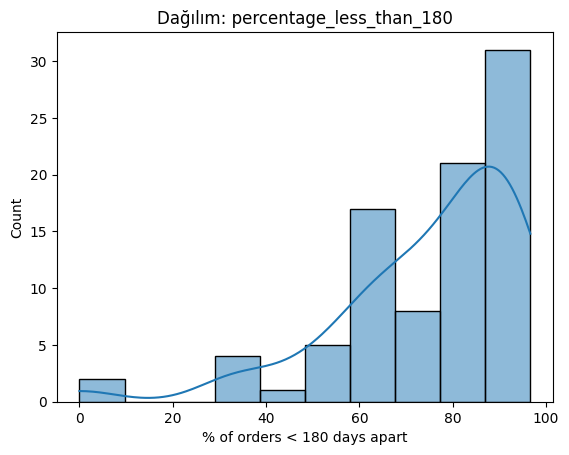

In [51]:
import seaborn as sns

sns.histplot(summary['percentage_less_than_180'], bins=10, kde=True)
plt.xlabel('% of orders < 180 days apart')
plt.title('Dağılım: percentage_less_than_180')
plt.show()


In [45]:
df["best_customer"] = summary["best_customer"]
df["target"] = summary["target"]

In [46]:
df

,customer_id,order_count,median_order_size,country,top_category,top_season,best_customer,target
0,ALFKI,12,830.1500,Germany,2,Spring,mid-high,1
1,ANATR,10,399.8750,Mexico,4,Spring,low,0
2,ANTON,17,749.0625,Mexico,4,Autumn,mid-high,1
3,AROUT,30,480.0000,UK,1,Winter,high,1
4,BERGS,52,1277.6000,Sweden,1,Winter,high,1
...,...,...,...,...,...,...,...,...
84,WARTH,37,877.2000,Finland,4,Winter,high,1
85,WELLI,19,517.8000,Brazil,1,Winter,mid-low,1
86,WHITC,40,1284.6900,USA,3,Spring,high,1
87,WILMK,17,452.9000,Finland,1,Winter,mid-high,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        89 non-null     category
 1   order_count        89 non-null     int64   
 2   median_order_size  89 non-null     float64 
 3   country            89 non-null     category
 4   top_category       89 non-null     category
 5   top_season         89 non-null     object  
 6   best_customer      89 non-null     category
 7   target             89 non-null     int64   
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 7.3+ KB


In [49]:
categoric = df[["country", "top_category", "top_season", "best_customer", ]]
cat = pd.get_dummies(categoric).astype("int")
num = df.select_dtypes(include="number")
new = pd.concat([num, cat], axis=1)
correlation_matrix = new.corr()
target_correlations = correlation_matrix['target']
strong_correlations_mask = (target_correlations > 0.50) | (target_correlations < -0.50)
filtered_correlations = target_correlations[strong_correlations_mask]
filtered_correlations

target               1.000000
best_customer_low   -0.567835
Name: target, dtype: float64

In [50]:
# --- Sınıf Dengesizliği Yönetimi (Class Imbalance Handling) ---
# Hedef değişken dağılımı çok dengesizse (örn. %90-%10) class_weight kullanabiliriz.
class_weights_sklearn = class_weight.compute_class_weight('balanced',
                                                           classes=np.unique(y_train),
                                                           y=y_train)
class_weights = dict(enumerate(class_weights_sklearn))


NameError: name 'class_weight' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#  SMOTE (Synthetic Minority Over-sampling Technique) gibi teknikler kullanılabilir. SMOTE, azınlık sınıfına ait mevcut örneklere benzer sentetik yeni örnekler üreterek veri setini dengeler. Bu, modelin azınlık sınıfını daha iyi öğrenmesine yardımcı olabilir. Bu işlem, train_test_split'ten sonra ve sadece eğitim verisi üzerinde yapılmalıdır (imbalanced-learn kütüphanesi kullanılabilir).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Test verisini aynı scaler ile transform et
X_test_scaled = scaler.transform(X_test)


# --- SMOTE ile Veri Artırma (Sadece Eğitim Setine Uygula) ---
print("\nSMOTE Uygulanıyor...")
smote = SMOTE(random_state=42)
# SMOTE'u ölçeklenmiş eğitim verisine uygula
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Eğitim Seti Boyutu (SMOTE Sonrası): {X_train_resampled.shape}")
print("Eğitim Seti Hedef Dağılımı (SMOTE Sonrası):\n", pd.Series(y_train_resampled).value_counts(normalize=True))


# Ölçeklenmiş ve yeniden örneklenmiş veriyi DataFrame'e dönüştürmek (kontrol için)
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=features)
print("\nÖlçeklenmiş ve SMOTE Uygulanmış Eğitim Verisi İlk 5 Satır:")
print(X_train_resampled_df.head())

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_np = X_train_scaled.astype(np.float32)
y_train_np = y_train_res.astype(np.float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dropout(0.3), # 0.5 denendi
    Dense(32, activation='relu'),
    Dropout(0.2), # 0.5 denendi
    Dense(1, activation='sigmoid')  # ikili sınıflandırma için
])


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'f1_score'])


In [ ]:
history = model.fit(X_train_np, y_train_np, 
                    validation_split=0.2, # 0.4 denendi
                    epochs=30, batch_size=32)


In [ ]:
#test verisi ile değerlendirme: 
X_test_np = X_test_scaled.astype(np.float32)
y_pred = model.predict(X_test_np)
y_pred_class = (y_pred > 0.5).astype(int)